# Test `second_narrows_current` Module

Render figure object produced by the `nowcast.figures.fvcom.second_narrows_current` module.
Provides data for visual testing to confirm that refactoring has not adversely changed figure for web page.

Set-up and function call replicates as nearly as possible what is done in the `nowcast.workers.make_plots` worker.

Notebooks like this should be developed in a
[Nowcast Figures Development Environment](https://salishsea-nowcast.readthedocs.io/en/latest/figures/fig_dev_env.html)
so that all of the necessary dependency packages are installed.
The development has to be done on a workstation that has the Vancouver Harbour & Fraser River FVCOM model results `/opp/` parition mounted.

In [1]:
import io
from pathlib import Path
import shlex
import subprocess

import arrow
import xarray
import yaml

from nowcast.figures.fvcom import second_narrows_current

In [2]:
%matplotlib inline

The bits of `config/nowcast.yaml` that are required:

In [3]:
config = '''
    figures:
        dataset URLs:
            HRDPS fields: https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1
            tide stn ssh time series:
                # **Must be quoted to project {} characters**
                'https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSf{place}SSH10mV17-02'
                
    vhfr fvcom runs:
        stations dataset filename: vhfr_low_v2_station_timeseries.nc
        results archive:
            nowcast: /opp/fvcom/nowcast/
            forecast: /opp/fvcom/forecast/
'''

config = yaml.load(io.StringIO(config))

The bits that the `make_plots` worker must provide:

### Nowcast Figure

In [4]:
run_date = arrow.get('2018-10-15')
run_type = 'nowcast'

ddmmmyy = run_date.format('DDMMMYY').lower()
fvcom_stns_dataset_path_tmpl = (
    '/opp/fvcom/{run_type}/{ddmmmyy}/vhfr_low_v2_station_timeseries.nc'
)
if run_type == 'nowcast':
    fvcom_stns_dataset_path = Path(
        fvcom_stns_dataset_path_tmpl.format(run_type=run_type, ddmmmyy=ddmmmyy)
    )
else:
    nowcast_dataset_path = Path(
        fvcom_stns_dataset_path_tmpl.format(
            run_type='nowcast', ddmmmyy=run_date.format("DDMMMYY").lower())
    )
    forecast_dataset_path = Path(
        fvcom_stns_dataset_path_tmpl.format(
            run_type='forecast', ddmmmyy=run_date.format("DDMMMYY").lower())
    )
    fvcom_stns_dataset_path = Path('/tmp/vhfr_low_v2_station_timeseries_forecast.nc')
    cmd = (
        f'ncrcat -O {nowcast_dataset_path} {forecast_dataset_path} '
        f'-o {fvcom_stns_dataset_path}'
    )
    subprocess.check_output(shlex.split(cmd))
cmd = (
    f'ncrename -O -v siglay,sigma_layer -v siglev,sigma_level '
    f'{fvcom_stns_dataset_path} /tmp/{fvcom_stns_dataset_path.name}')
subprocess.check_output(shlex.split(cmd))
fvcom_stns_dataset = xarray.open_dataset(f'/tmp/{fvcom_stns_dataset_path.name}')


271 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


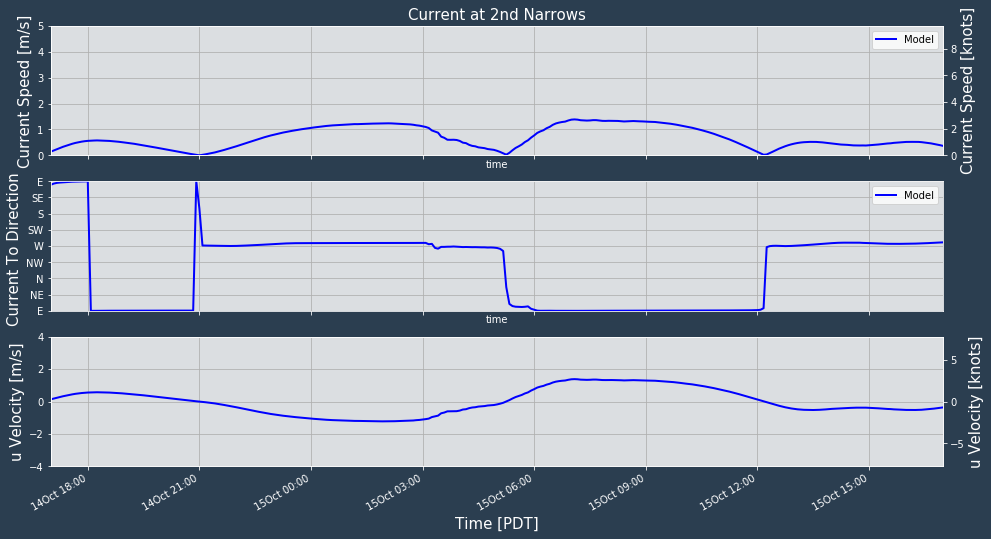

In [5]:
%%timeit -n1 -r1

from importlib import reload
reload(second_narrows_current)

fig = second_narrows_current.make_figure(
    '2nd Narrows', fvcom_stns_dataset,
)

### Forecast Figure

In [6]:
run_date = arrow.get('2018-10-15')
run_type = 'forecast'

ddmmmyy = run_date.format('DDMMMYY').lower()
fvcom_stns_dataset_path_tmpl = (
    '/opp/fvcom/{run_type}/{ddmmmyy}/vhfr_low_v2_station_timeseries.nc'
)
if run_type == 'nowcast':
    fvcom_stns_dataset_path = Path(
        fvcom_stns_dataset_path_tmpl.format(run_type=run_type, ddmmmyy=ddmmmyy)
    )
else:
    nowcast_dataset_path = Path(
        fvcom_stns_dataset_path_tmpl.format(
            run_type='nowcast', ddmmmyy=run_date.format("DDMMMYY").lower())
    )
    forecast_dataset_path = Path(
        fvcom_stns_dataset_path_tmpl.format(
            run_type='forecast', ddmmmyy=run_date.format("DDMMMYY").lower())
    )
    fvcom_stns_dataset_path = Path('/tmp/vhfr_low_v2_station_timeseries_forecast.nc')
    cmd = (
        f'ncrcat -O {nowcast_dataset_path} {forecast_dataset_path} '
        f'-o {fvcom_stns_dataset_path}'
    )
    subprocess.check_output(shlex.split(cmd))
cmd = (
    f'ncrename -O -v siglay,sigma_layer -v siglev,sigma_level '
    f'{fvcom_stns_dataset_path} /tmp/{fvcom_stns_dataset_path.name}')
subprocess.check_output(shlex.split(cmd))
fvcom_stns_dataset = xarray.open_dataset(f'/tmp/{fvcom_stns_dataset_path.name}')


195 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


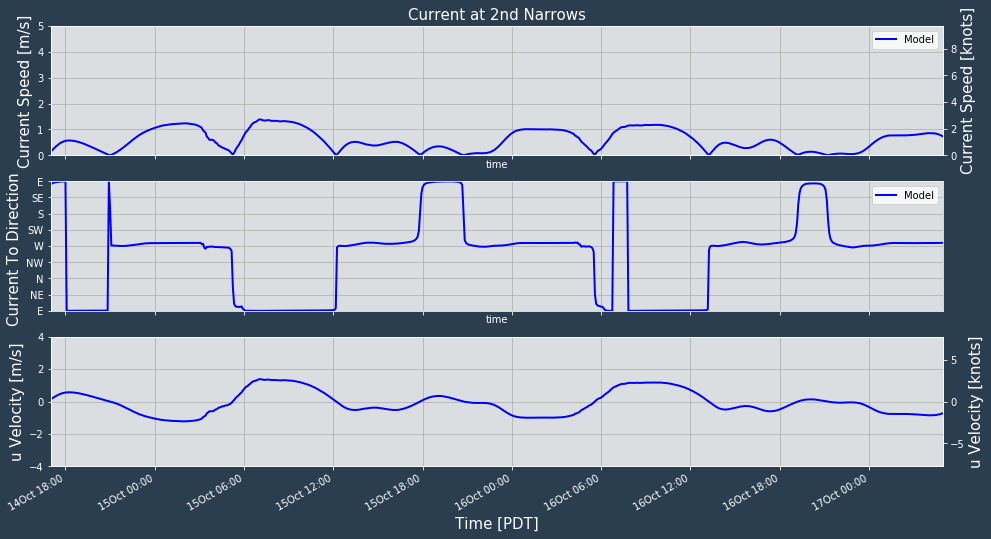

In [7]:
%%timeit -n1 -r1

from importlib import reload
reload(second_narrows_current)

fig = second_narrows_current.make_figure(
    '2nd Narrows', fvcom_stns_dataset,
)